# Prediction of Household Income based on Demographic Data
____
Tejas Pant <br>
07/06/2019

**Objective:** 
The objective of this study is to predict the class of household income for individuals based on their demographic data. The dataset used for this study is the publicly available NHANES dataset

Following steps were taken in the study:<br>
* Initial Exploration of Data
* Feature Selection and Feature Transformation
* Comparison of Performance of Machine Learning Models like:
    * Random Forest Classifier
    * Gradient Boosting Classifier
    * Support Vector Machine Classifier
    * k-Nearest Neighbor Classifier
    * Naive Bayes Classifier
    * Logistic Regression
    * Multi-Layer Perceptron Classifier

### Load all the required modules, APIs

In [2]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC 
from sklearn import metrics
from sklearn import ensemble
from sklearn.metrics import confusion_matrix
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import f_classif

### Reading demographic dataset

In [3]:
df = pd.read_csv('DEMO_I.csv')
df.describe()

,SEQN,SDDSRVYR,RIDSTATR,RIAGENDR,RIDAGEYR,RIDAGEMN,RIDRETH1,RIDRETH3,RIDEXMON,RIDEXAGM,...,DMDHREDU,DMDHRMAR,DMDHSEDU,WTINT2YR,WTMEC2YR,SDMVPSU,SDMVSTRA,INDHHIN2,INDFMIN2,INDFMPIR
count,9971.000000,9971.0,9971.000000,9971.000000,9.971000e+03,6.950000e+02,9971.000000,9971.000000,9544.000000,4.060000e+03,...,9575.000000,9909.000000,5226.000000,9971.000000,9.971000e+03,9971.000000,9971.000000,9626.000000,9642.000000,8.919000e+03
mean,88717.000000,9.0,1.957176,1.509377,3.189941e+01,1.078561e+01,3.007321,3.213118,1.518650,1.045350e+02,...,3.459530,2.813503,3.596441,31740.150837,3.174015e+04,1.485809,126.266673,11.522439,11.252126,2.269277e+00
std,2878.524101,0.0,0.202471,0.499937,2.476883e+01,7.015325e+00,1.317594,1.679606,0.499678,6.897295e+01,...,1.331829,5.962991,1.381068,32929.536529,3.410557e+04,0.499824,4.238500,15.191049,15.219413,1.576345e+00
min,83732.000000,9.0,1.000000,1.000000,5.397605e-79,5.397605e-79,1.000000,1.000000,1.000000,5.397605e-79,...,1.000000,1.000000,1.000000,3293.928267,5.397605e-79,1.000000,119.000000,1.000000,1.000000,5.397605e-79
25%,86224.500000,9.0,2.000000,1.000000,9.000000e+00,5.000000e+00,2.000000,2.000000,1.000000,4.100000e+01,...,3.000000,1.000000,3.000000,12878.501052,1.255053e+04,1.000000,123.000000,6.000000,5.000000,9.700000e-01
50%,88717.000000,9.0,2.000000,2.000000,2.700000e+01,1.000000e+01,3.000000,3.000000,2.000000,1.000000e+02,...,4.000000,1.000000,4.000000,20160.468137,2.028132e+04,1.000000,126.000000,8.000000,8.000000,1.820000e+00
75%,91209.500000,9.0,2.000000,2.000000,5.300000e+01,1.700000e+01,4.000000,4.000000,2.000000,1.620000e+02,...,4.000000,4.000000,5.000000,33257.364572,3.370815e+04,2.000000,130.000000,14.000000,14.000000,3.480000e+00
max,93702.000000,9.0,2.000000,2.000000,8.000000e+01,2.400000e+01,5.000000,7.000000,2.000000,2.390000e+02,...,9.000000,99.000000,9.000000,233755.841850,2.423867e+05,2.000000,133.000000,99.000000,99.000000,5.000000e+00


### Description of all the features in the data <br>
**SEQN** - Respondent sequence number. Unique number for each member <br>
**SDDSRVYR** - Data release cycle. Same for all the entries in table since data is for 2015-2016 <br>
**RIDSTATR** - Interview and examination status of the participant. Some members were only interviewed while others were examined too <br>
**RIAGENDR** - Gender of participant <br>
**RIDAGEYR** - Age in years at the time of screening <br>
**RIDAGEMN** - Age in months of the participant at the time of screening. Reported
for persons aged 24 months or younger at the time of exam <br>
**RIDRETH1** - Recode of reported race and Hispanic origin information <br>
**RIDRETH3** - Recode of reported race and Hispanic origin information, with NonHispanic Asian Category. Use this. <br>
**RIDEXMON** - Six month time period when the examination was performed two
categories: November 1 through April 30, May 1 through October 31. <br>
**RIDEXAGM** - Age in months of the participant at the time of examination.
Reported for persons aged 19 years or younger at the time of
examination <br>
**DMQMILIZ** - {Have you/Has SP} ever served on active duty in the U.S. Armed
Forces, military Reserves, or National Guard? (Active duty does not
include training for the Reserves or National Guard, but does include
activation, for service in the U.S. or in a foreign country, in support
of military or humanitarian operations.) <br>
**DMQADFC** - Did {you/SP} ever serve in a foreign country during a time of armed
conflict or on a humanitarian or peacekeeping
mission? (This would
include National Guard or reserve or active duty monitoring or
conducting peace keeping operations in Bosnia and Kosovo, in the
Sinai between Egypt and Israel, or in response to the 2004 tsunami
or Haiti in 2010.) <br>
**DMDBORN4** - In what country {were you/was SP} born? <br>
**DMDCITZN** - {Are you/Is SP} a citizen of the United States <br>
**DMDYRSUS** - Length of time the participant has been in the US <br>
**DMDEDUC3** - What is the highest grade or level of school {you have/SP has}
completed or the highest degree {you have/s/he has} received?. Only for people betweenn 6-19 years <br>
**DMDEDUC2** - What is the highest grade or level of school {you have/SP has}
completed or the highest degree {you have/s/he has} received?. For adults 20+ <br>
**DMDMARTL** - Marital Status <br>
**RIDEXPRG** - Pregnancy status for females between 20 and 44 years of age at the
time of MEC exam <br>
**SIALANG** - Language of the Sample Person Interview Instrument <br>
**SIAPROXY** - Was a Proxy respondent used in conducting the Sample Person (SP)
interview? <br>
**SIAINTRP** - Was an interpreter used to conduct the Sample Person (SP)
interview? <br>
**FIALANG** - Language of the Family Interview Instrument <br>
**FIAPROXY** - Was a Proxy respondent used in conducting the Family Interview? <br>
**FIAINTRP** - Was an interpreter used to conduct the Family interview <br>
**MIALANG** - Language of the MEC CAPI Interview Instrument <br>
**MIAPROXY** - Was a Proxy respondent used in conducting the MEC CAPI Interview? <br>
**MIAINTRP** - Was an interpreter used to conduct the MEC CAPI interview <br>
**AIALANGA** - Language of the MEC ACASI Interview Instrument <br>
**DMDHHSIZ** - Total number of people in the Household <br>
**DMDFMSIZ** - Total number of people in the Family <br>
**DMDHHSZA** - Number of children aged 5 years or younger in the household <br>
**DMDHHSZB** - Number of children aged 6-17
years old in the household <br>
**DMDHHSZE** - Number of adults aged 60 years or older in the household <br>
**DMDHRGND** - HH reference person's gender <br>
**DMDHRAGE** - HH reference person's age in years <br>
**DMDHRBR4** - HH reference person's country of birth <br>
**DMDHREDU** - HH reference person's education level <br>
**DMDHRMAR** - HH reference person's marital status <br>
**DMDHSEDU** - HH reference person's spouse's education level <br>
**WTINT2YR** - Full sample 2 year interview weight. <br>
**WTMEC2YR** - Full sample 2 year MEC exam weight. Not using this since it is 0 for people not examined <br>
**SDMVPSU** - Masked variance unit pseudoPSU
variable for variance estimation <br>
**SDMVSTRA** - Masked variance unit pseudostratum
variable for variance
estimation <br>
**INDHHIN2** - Total household income (reported as a range value in dollars) <br>
**INDFMIN2** - Total family income (reported as a range value in dollars) <br>
**INDFMPIR** - A ratio of family income to poverty guidelines. <br>





### Exploration of Data and Feature Selection
____
* In this section we initially explore the data to explore the features available for prediction of BMI
* Box plots are made for some of the features to check for outliers
* Histograms are made for the feature variables and the target variable BMI to see the shape of their distribution
* We select feature variables that will be used for predicting the BMI using the different models
* Features that have more than 50% missing values are outright rejected
* Features which have redundant information are removed
* Some of the features are removed after training a random forest regression model and looking at the feature importance plots

In [4]:
df.isna().sum()

SEQN           0
SDDSRVYR       0
RIDSTATR       0
RIAGENDR       0
RIDAGEYR       0
RIDAGEMN    9276
RIDRETH1       0
RIDRETH3       0
RIDEXMON     427
RIDEXAGM    5911
DMQMILIZ    3822
DMQADFC     9444
DMDBORN4       0
DMDCITZN       2
DMDYRSUS    7735
DMDEDUC3    7324
DMDEDUC2    4252
DMDMARTL    4252
RIDEXPRG    8683
SIALANG        0
SIAPROXY       1
SIAINTRP       0
FIALANG      329
FIAPROXY     329
FIAINTRP     329
MIALANG     2994
MIAPROXY    2993
MIAINTRP    2993
AIALANGA    4009
DMDHHSIZ       0
DMDFMSIZ       0
DMDHHSZA       0
DMDHHSZB       0
DMDHHSZE       0
DMDHRGND       0
DMDHRAGE       0
DMDHRBR4     396
DMDHREDU     396
DMDHRMAR      62
DMDHSEDU    4745
WTINT2YR       0
WTMEC2YR       0
SDMVPSU        0
SDMVSTRA       0
INDHHIN2     345
INDFMIN2     329
INDFMPIR    1052
dtype: int64

In [5]:
def featureSelection(df):
    #dropping features with too many missing values
    df1 = df.drop(['RIDAGEMN','RIDEXMON','RIDEXAGM','DMQMILIZ','DMQADFC','DMDCITZN','DMDYRSUS','DMDMARTL','RIDEXPRG'],axis=1)
    df1 = df1.drop(['FIALANG','FIAPROXY','FIAINTRP','MIALANG','MIAPROXY','MIAINTRP','AIALANGA','DMDHSEDU'], axis=1)

    #dropping because same for all features or redundant information
    df1 = df1.drop(['SDDSRVYR','RIDRETH1', 'WTMEC2YR'],axis=1)#WTMEC2YR is zero for people not examined hence dropped.

    #droppping because irrelevant information
    #df1 = df1.drop(['SIAPROXY','RIDSTATR','INDFMIN2','INDFMPIR'],axis=1)
    df1 = df1.drop(['SIAPROXY','RIDSTATR','INDFMIN2','INDFMPIR'],axis=1) 

    #Check if all people above the age of 20 have some entry for education level
    assert (df1['RIDAGEYR'].loc[(df1['RIDAGEYR']>20) & (np.isfinite(df1['DMDEDUC2']))].count() == df1['RIDAGEYR'].loc[df1['RIDAGEYR']>20].count())

    #Check if there are any people who have entries for both 
    #if (np.isfinite(df1['DMDEDUC3']) & np.isfinite(df1['DMDEDUC2'])).sum() == 0:
    #    df1['DMDEDUC'] = df['DMDEDUC3'].combine_first(df['DMDEDUC2'])

    # Drop DMDEDUC3, DMDEDUC2 since we have combined them
    df1 = df1.drop(['DMDEDUC2','DMDEDUC3'],axis=1)
    df1 = df1[np.isfinite(df['INDHHIN2'])]
    df1 = df1[np.isfinite(df['DMDHRBR4'])] #all the entries that do not have HH country of birth do not have level of education
    df1 = df1[np.isfinite(df['DMDHRMAR'])]
    #df2 = df1[np.isfinite(df1['DMDEDUC'])]
    #df2 = df2.drop(['SEQN'],axis = 1)
    #df1 = df1[np.isfinite(df['INDFMPIR'])]
    df1 = df1.drop(['SIALANG', 'SIAINTRP'],axis=1)
    df1 = df1.drop(['RIDAGEYR','RIAGENDR'],axis = 1)
    df1 = df1.drop(['DMDBORN4'],axis=1)
    df1 = df1.drop(['WTINT2YR'],axis=1)
    df2 = df1.drop(['SEQN'],axis = 1)
    df2 = df2.drop(['SDMVPSU','SDMVSTRA'],axis=1)
    return df2

In [6]:
df2 = featureSelection(df)
df2.columns

C:\Users\tejas\Anaconda3\lib\site-packages\ipykernel_launcher.py:23: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
C:\Users\tejas\Anaconda3\lib\site-packages\ipykernel_launcher.py:24: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


Index(['RIDRETH3', 'DMDHHSIZ', 'DMDFMSIZ', 'DMDHHSZA', 'DMDHHSZB', 'DMDHHSZE',
       'DMDHRGND', 'DMDHRAGE', 'DMDHRBR4', 'DMDHREDU', 'DMDHRMAR', 'INDHHIN2'],
      dtype='object')

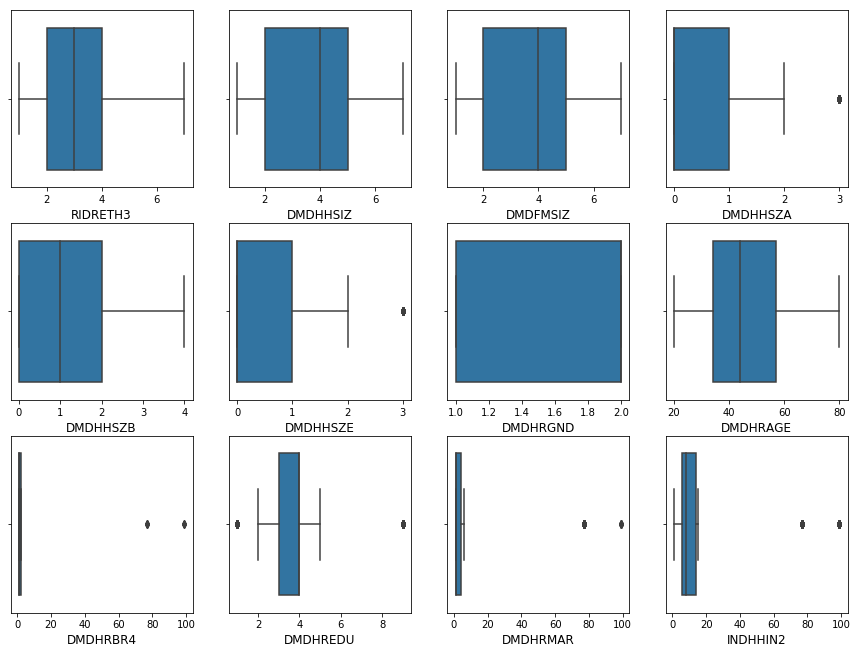

In [7]:
#Box plots for select features to check for outliers
plt.figure(figsize=(15,15))
fnum = 1
for i in df2.columns:
    plt.subplot(4,4,fnum)
    sns.boxplot(df2[i])
    plt.xlabel(i, size = 12)
    fnum += 1
plt.show()

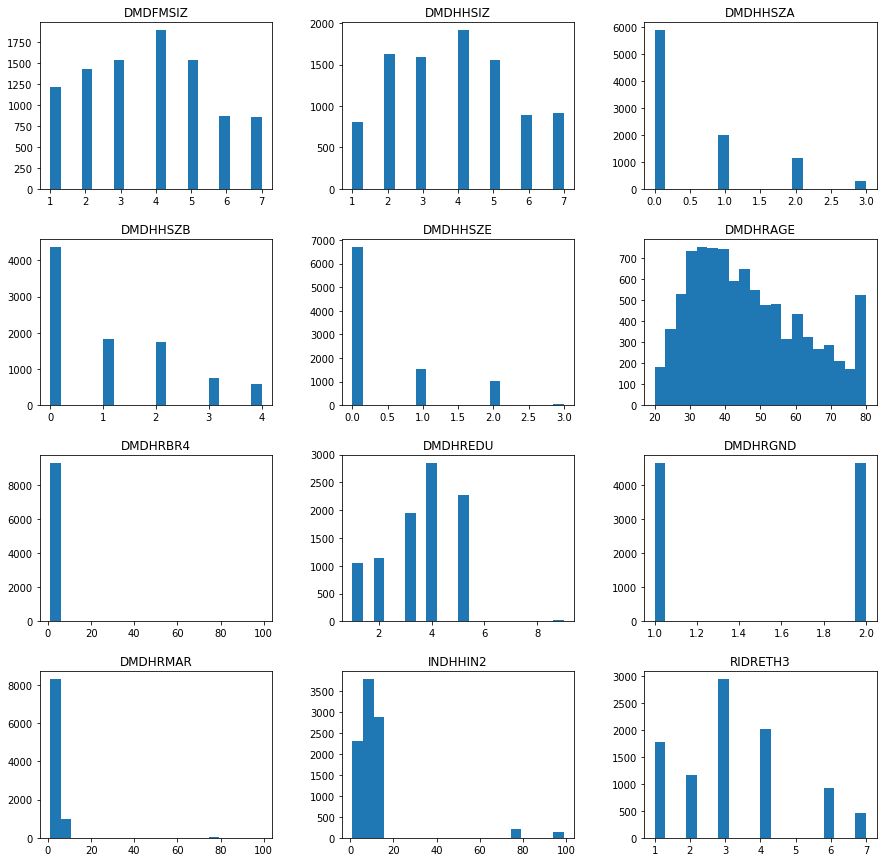

In [32]:
# Histogram plots for select features
hist = df2.hist(bins=20,figsize=(15,15),grid=False)

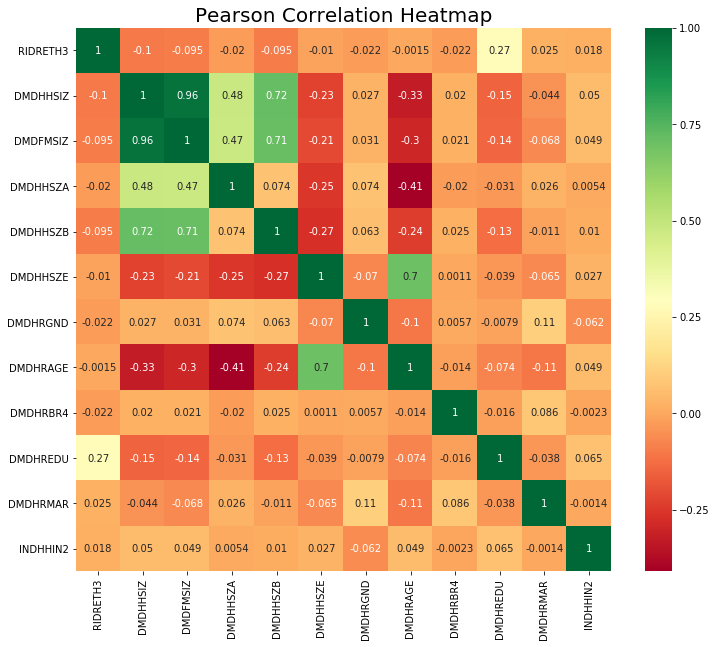

In [33]:
#Correlation Heatmap for selected features
plt.figure(figsize=(12, 10))
sns.heatmap(df2.corr(), annot=True, cmap="RdYlGn")
plt.title("Pearson Correlation Heatmap",size=20)
plt.show();

## Split Data into Training Set and Test Set
____
* All the feature variables are normalized using $\frac{X - \mu}{\sigma}$
* We split the entire data set into 70% training set and 30% test set
* A validation set is not defined since the number of samples in the training set is small and we use parameter grid search for all the models which uses k-fold cross-validation to identify the best parameters 


In [14]:
def splitDataset(df2):
    y_ = list(df2['INDHHIN2'])
    df2 = df2.drop(['INDHHIN2'],axis=1)
    Xmean = list(df2.mean())
    Xstd = list(df2.mean())
    df2norm = (df2 - df2.mean()) / df2.std()
    #df2norm = df2
    #df2norm.describe()
    #train, test, y__, y_test = train_test_split(df2norm, y_, test_size=0.2)
    #train, valid, y_train, y_valid = train_test_split(train, y__, test_size=0.25)

    train, test, y_train, y_test = train_test_split(df2norm, y_, test_size=0.3)

    print('Size of Training Set: ', len(train))
    #print('Size of Validation Set: ',len(valid))
    print('Size of Test Set: ',len(test))
    X_train = train.values.tolist()
    #X_valid = valid.values.tolist()
    X_test = test.values.tolist()
    assert len(X_train) == len(y_train)
    #assert len(X_valid) == len(y_valid)
    assert len(X_test) == len(y_test)
    return X_train, X_test, y_train, y_test, df2norm

In [34]:
X_train, X_test, y_train, y_test, df2norm = splitDataset(df2)
assert len(df2norm.columns) == len(X_train[0])

Size of Training Set:  6518
Size of Test Set:  2794


### Use ANOVA Test to Select K-Best Features
* Experimented with using ANOVA test for feature selection
* Results were worse than the currently selected feature variables and hence not used

In [78]:
#Gives worse results. Do no use!!!
'''
X_all = X_train + X_test
y_all = y_train + y_test
X_all_new = SelectKBest(f_classif, k=4).fit_transform(X_all, y_all)
X_train, X_test, y_train, y_test = train_test_split(X_all_new, y_all, test_size=0.3)
'''

### Look at distribution of Classes in Test Set

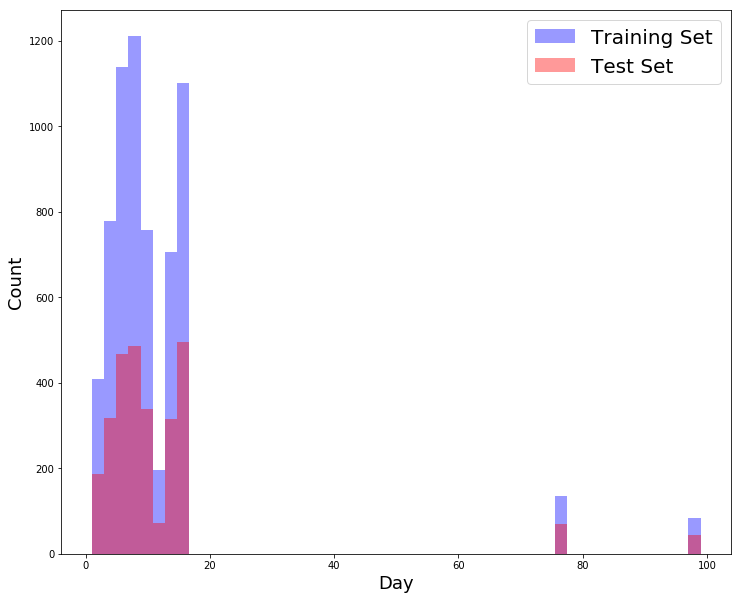

In [35]:
fig, ax = plt.subplots()
fig.set_size_inches(12, 10)
sns.distplot(y_train, color="blue", hist=True, bins=50, kde = False, label="Training Set")
sns.distplot(y_test, color="red", hist=True, bins=50, kde = False, label="Test Set")
#ax.set_title('Distribution of Day of Year on which Driver Came Onboard \n', size = 20)
ax.set_ylabel('Count', size = 18)
ax.set_xlabel('Day', size = 18)
plt.legend(loc=1, prop={'size': 20})
plt.show()

## Training different ML models
* In this section we inspect the performance of different multi-class classification models in predicting the class of the household income


### Random Forest Model

In [36]:
def RFGridSearch():
    rfc = RandomForestClassifier(random_state=0)
    param_grid = { 'n_estimators': [100, 200, 400, 800], 'max_depth' : [2,4,8,16,20]}
    CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv=5)
    CV_rfc.fit(X_train, y_train)
    return CV_rfc.best_params_

def RFClassifier(best_params):
    rfc = RandomForestClassifier(n_estimators=best_params['n_estimators'], max_depth=best_params['max_depth'],random_state=0)
    rfc.fit(X_train, y_train) 
    acc_train = accuracy_score(y_train, rfc.predict(X_train))
    acc_test = accuracy_score(y_test, rfc.predict(X_test))
    print("Train Accuracy : ", acc_train)
    print("Test Accuracy : ", acc_test)
    feat_imp = rfc.feature_importances_
    return acc_train, acc_test, feat_imp, rfc

In [37]:
%%time
#Carry out a grid search 
#rfc_best_params = RFGridSearch()
rfc_best_params = dict({'max_depth': 20, 'n_estimators': 400}) #this was obtained from the Grid search
rfc_train, rfc_test, rf_feat_imp, rfclf = RFClassifier(rfc_best_params)

Train Accuracy :  0.961491254986192
Test Accuracy :  0.7143879742304939
Wall time: 4.9 s


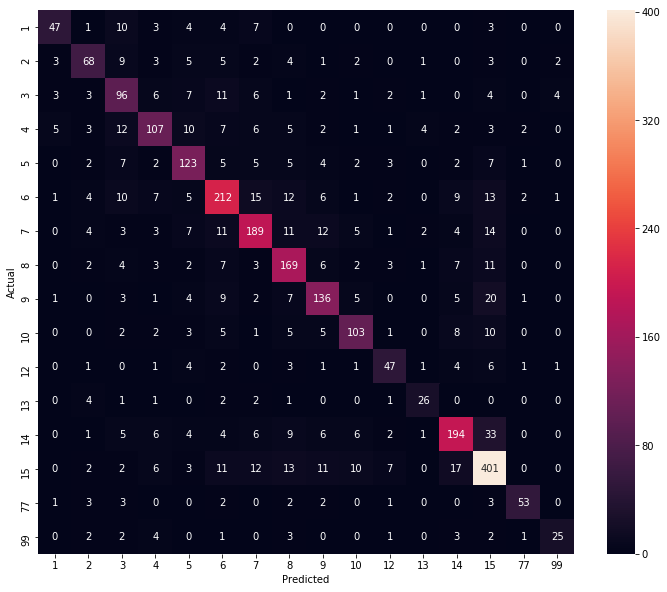

In [38]:
rf_cm = confusion_matrix(y_test, rfclf.predict(X_test))
class_names = [1,2,3,4,5,6,7,8,9,10,12,13,14,15,77,99]
fig, ax = plt.subplots(figsize=(12,10))
sns.heatmap(rf_cm, annot=True, fmt='d', xticklabels=class_names, yticklabels=class_names)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [39]:
#Classification report
print(metrics.classification_report(y_test, rfclf.predict(X_test)))

              precision    recall  f1-score   support

         1.0       0.77      0.59      0.67        79
         2.0       0.68      0.63      0.65       108
         3.0       0.57      0.65      0.61       147
         4.0       0.69      0.63      0.66       170
         5.0       0.68      0.73      0.70       168
         6.0       0.71      0.71      0.71       300
         7.0       0.74      0.71      0.72       266
         8.0       0.68      0.77      0.72       220
         9.0       0.70      0.70      0.70       194
        10.0       0.74      0.71      0.73       145
        12.0       0.65      0.64      0.65        73
        13.0       0.70      0.68      0.69        38
        14.0       0.76      0.70      0.73       277
        15.0       0.75      0.81      0.78       495
        77.0       0.87      0.76      0.81        70
        99.0       0.76      0.57      0.65        44

   micro avg       0.71      0.71      0.71      2794
   macro avg       0.72   

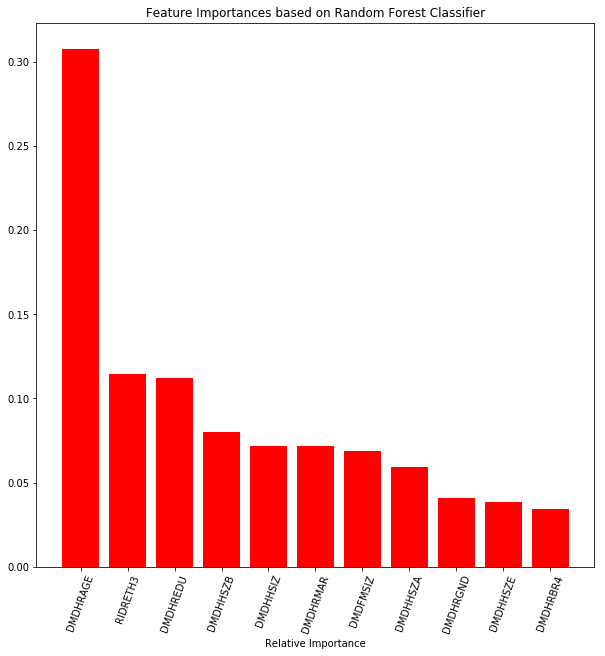

In [40]:
features=list(df2norm.columns)
importances = rf_feat_imp
indices = np.argsort(-importances)
featname_sort = [features[i] for i in indices]

plt.figure(figsize=(10,10))
plt.title('Feature Importances based on Random Forest Classifier')
plt.bar(range(len(indices)), importances[indices], color='r', align='center')
plt.xticks(range(len(indices)), featname_sort, rotation =70)
plt.xlabel('Relative Importance')
plt.show()

### Gradient Boosting Classification

In [41]:
def GradBoostGridSearch():
    gb = ensemble.GradientBoostingClassifier(random_state=0)
    param_grid = { 'n_estimators': [100, 200, 400, 800], 'max_depth' : [2,4,8,16,20]}
    CV_gb = GridSearchCV(estimator=gb, param_grid=param_grid, cv=5)
    CV_gb.fit(X_train, y_train)
    return CV_gb.best_params_

def GBClassifier(best_params):
    original_params = {'n_estimators': 400, 'max_depth': 24, 'random_state': 1}
    params = dict(original_params)
    gbc = ensemble.GradientBoostingClassifier(n_estimators=best_params['n_estimators'], max_depth=best_params['max_depth'],random_state=0)
    gbc.fit(X_train, y_train)
    acc_train = accuracy_score(y_train, gbc.predict(X_train))
    acc_test = accuracy_score(y_test, gbc.predict(X_test))
    print("Train Accuracy : ", acc_train)
    #print("Validation Accuracy : ", accuracy_score(y_valid, clf.predict(X_valid)))
    print("Test Accuracy : ", acc_test)
    return acc_train, acc_test, gbc

In [42]:
%%time
#gbc_best_params = GradBoostGridSearch()
gbc_best_params = dict({'max_depth': 20, 'n_estimators': 400}) #this was obtained from the Grid search
gbc_train, gbc_test, gbc = GBClassifier(rfc_best_params)

Train Accuracy :  0.961491254986192
Test Accuracy :  0.7072297780959198
Wall time: 2min 42s


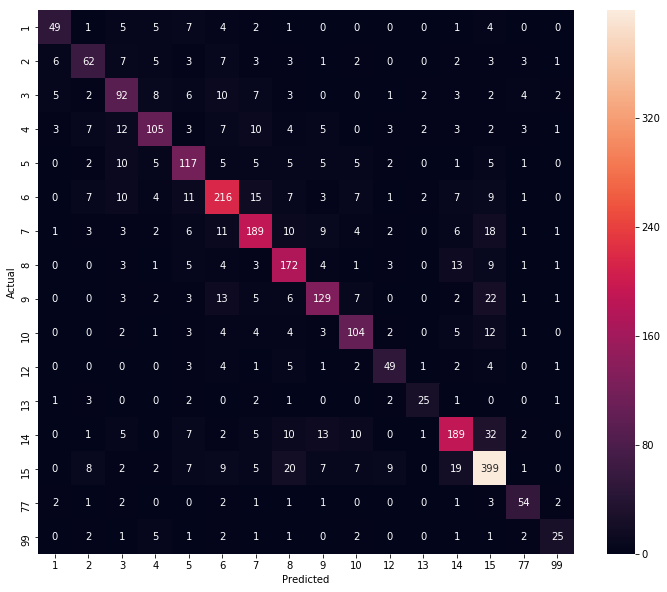

In [43]:
gbc_cm = confusion_matrix(y_test, gbc.predict(X_test))
class_names = [1,2,3,4,5,6,7,8,9,10,12,13,14,15,77,99]
fig, ax = plt.subplots(figsize=(12,10))
sns.heatmap(gbc_cm, annot=True, fmt='d', xticklabels=class_names, yticklabels=class_names)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [44]:
#Classification report
print(metrics.classification_report(y_test, gbc.predict(X_test)))

              precision    recall  f1-score   support

         1.0       0.73      0.62      0.67        79
         2.0       0.63      0.57      0.60       108
         3.0       0.59      0.63      0.61       147
         4.0       0.72      0.62      0.67       170
         5.0       0.64      0.70      0.66       168
         6.0       0.72      0.72      0.72       300
         7.0       0.73      0.71      0.72       266
         8.0       0.68      0.78      0.73       220
         9.0       0.71      0.66      0.69       194
        10.0       0.69      0.72      0.70       145
        12.0       0.66      0.67      0.67        73
        13.0       0.76      0.66      0.70        38
        14.0       0.74      0.68      0.71       277
        15.0       0.76      0.81      0.78       495
        77.0       0.72      0.77      0.74        70
        99.0       0.69      0.57      0.62        44

   micro avg       0.71      0.71      0.71      2794
   macro avg       0.70   

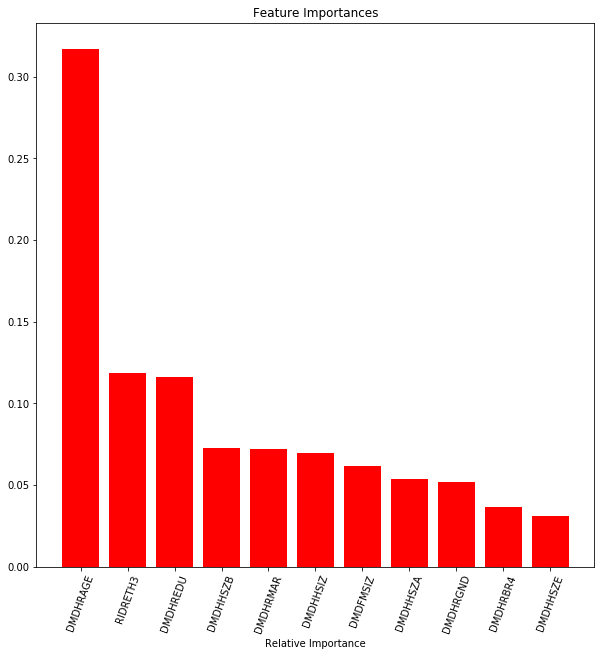

In [45]:
features=list(df2.columns)
importances = gbc.feature_importances_
indices = np.argsort(-importances)
featname_sort = [features[i] for i in indices]

plt.figure(figsize=(10,10))
plt.title('Feature Importances')
plt.bar(range(len(indices)), importances[indices], color='r', align='center')
plt.xticks(range(len(indices)), featname_sort, rotation =70)
plt.xlabel('Relative Importance')
plt.show()

### Support Vector Machine

In [46]:
def SVMGridSearch():
    svm = SVC()
    param_grid = [{'kernel': ['rbf'], 'gamma': [1e-3, 1e-4],'C': [1, 10, 100, 1000]},
                    {'kernel': ['linear'], 'C': [1, 10, 100, 1000]}]
    CV_svm = GridSearchCV(estimator=svm, param_grid=param_grid, cv=5)
    CV_svm.fit(X_train, y_train)
    return CV_svm.best_params_, CV_svm.best_score_ 

def SVMClassifier(best_params):
    svm = SVC(kernel = best_params['kernel'], C = best_params['C']).fit(X_train, y_train) 
    acc_train = accuracy_score(y_train, svm.predict(X_train))
    acc_test = accuracy_score(y_test, svm.predict(X_test))
    print("Train Accuracy : ", acc_train)
    #print("Validation Accuracy : ", accuracy_score(y_valid, clf.predict(X_valid)))
    print("Test Accuracy : ", acc_test)
    return acc_train, acc_test, svm

In [47]:
%%time
#svm_best_params, svm_best_score = SVMGridSearch()
svc_best_params = dict({'kernel': 'rbf', 'C': 1000}) #this was obtained from the Grid search
svm_train, svm_test, svmclf = SVMClassifier(svc_best_params)

C:\Users\tejas\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Train Accuracy :  0.8488800245474072
Test Accuracy :  0.6338582677165354
Wall time: 17 s


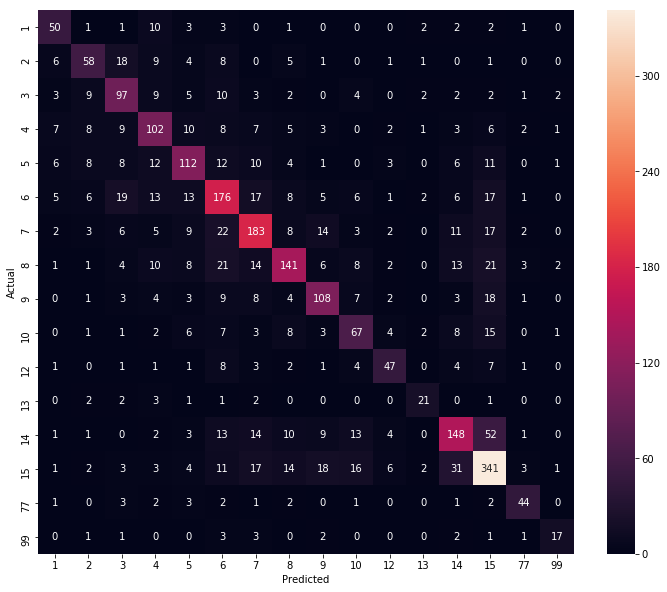

In [34]:
# creating a confusion matrix 
svm_cm = confusion_matrix(y_test, svmclf.predict(X_test)) 
class_names = [1,2,3,4,5,6,7,8,9,10,12,13,14,15,77,99]
fig, ax = plt.subplots(figsize=(12,10))
sns.heatmap(svm_cm, annot=True, fmt='d', xticklabels=class_names, yticklabels=class_names)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

### Logistic Regression

In [48]:
def LogRegClassifier():
    lgc = LogisticRegression(penalty='l2', solver='lbfgs', multi_class='multinomial').fit(X_train, y_train)
    acc_train = accuracy_score(y_train, lgc.predict(X_train))
    acc_test = accuracy_score(y_test, lgc.predict(X_test))
    print("Train Accuracy : ", acc_train)
    #print("Validation Accuracy : ", accuracy_score(y_valid, clf.predict(X_valid)))
    print("Test Accuracy : ", acc_test)
    return acc_train, acc_test, lgc

In [49]:
%%time
lgc_train, lgc_test, lgcclf = LogRegClassifier()

Train Accuracy :  0.2433261736729058
Test Accuracy :  0.2279885468861847
Wall time: 1.01 s


C:\Users\tejas\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


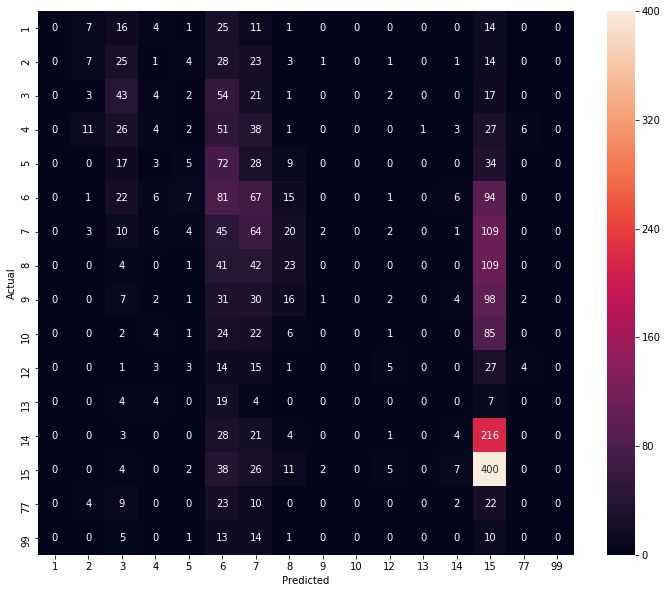

In [50]:
# creating a confusion matrix 
lgc_cm = confusion_matrix(y_test, lgcclf.predict(X_test)) 
class_names = [1,2,3,4,5,6,7,8,9,10,12,13,14,15,77,99]
fig, ax = plt.subplots(figsize=(12,10))
sns.heatmap(lgc_cm, annot=True, fmt='d', xticklabels=class_names, yticklabels=class_names)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

### k - Nearest Neighbor

In [51]:
#Nearest Neighbor
def kNNClassifier(nNeighbors):
    knn = KNeighborsClassifier(n_neighbors=nNeighbors)
    knn.fit(X_train, y_train) 
    acc_train = accuracy_score(y_train, knn.predict(X_train))
    acc_test = accuracy_score(y_test, knn.predict(X_test))
    print("Train Accuracy : ", acc_train)
    #print("Validation Accuracy : ", accuracy_score(y_valid, clf.predict(X_valid)))
    print("Test Accuracy : ", acc_test)
    return acc_train, acc_test, knn

In [54]:
%%time
num_neigh = 1 #number of neighbors
knn_train, knn_test, knnclf = kNNClassifier(num_neigh)

Train Accuracy :  0.9559680883706658
Test Accuracy :  0.699713672154617
Wall time: 284 ms


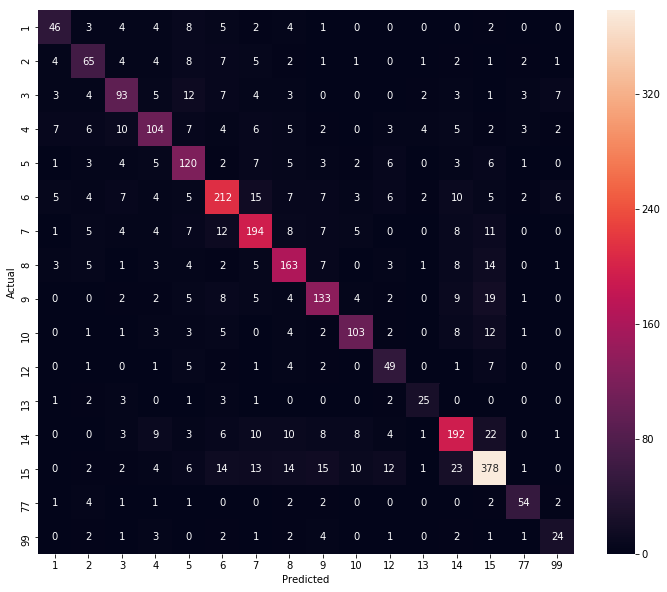

In [55]:
# creating a confusion matrix 
knn_cm = confusion_matrix(y_test, knnclf.predict(X_test)) 
class_names = [1,2,3,4,5,6,7,8,9,10,12,13,14,15,77,99]
fig, ax = plt.subplots(figsize=(12,10))
sns.heatmap(knn_cm, annot=True, fmt='d', xticklabels=class_names, yticklabels=class_names)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

### Gaussian Naive Bayes

In [56]:
#Gaussian Naive Bayes
def GNBClassifier():
    gnb = GaussianNB()
    gnb.fit(X_train, y_train) 
    acc_train = accuracy_score(y_train, gnb.predict(X_train))
    acc_test = accuracy_score(y_test, gnb.predict(X_test))
    print("Train Accuracy : ", acc_train)
    #print("Validation Accuracy : ", accuracy_score(y_valid, clf.predict(X_valid)))
    print("Test Accuracy : ", acc_test)
    return acc_train, acc_test, gnb

In [57]:
%%time
gnb_train, gnb_test, gnbclf = GNBClassifier()

Train Accuracy :  0.19254372506903958
Test Accuracy :  0.19577666428060128
Wall time: 46.9 ms


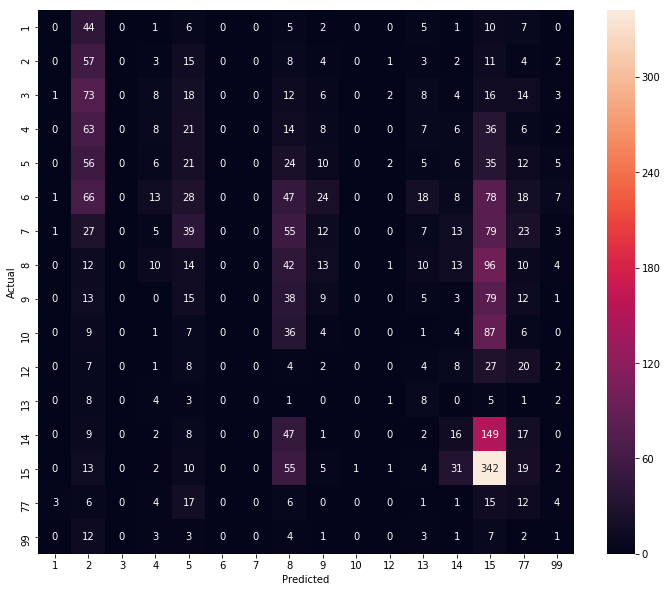

In [53]:
# creating a confusion matrix 
gnb_cm = confusion_matrix(y_test, gnbclf.predict(X_test)) 
class_names = [1,2,3,4,5,6,7,8,9,10,12,13,14,15,77,99]
fig, ax = plt.subplots(figsize=(12,10))
sns.heatmap(gnb_cm, annot=True, fmt='d', xticklabels=class_names, yticklabels=class_names)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

### MLP Classifier

In [67]:
def MLPGridSearch():
    mlpsearch = MLPClassifier(solver='lbfgs', alpha=1e-5, random_state=0)
    #param_grid = { 'hidden_layer_sizes':np.arange(10, 15)}
    param_grid = { 'hidden_layer_sizes':[(100,100,100,100), (200,200,200,200), (400,400,400,400)]}
    CV_mlp = GridSearchCV(estimator=mlpsearch, param_grid=param_grid, cv=5)
    CV_mlp.fit(X_train, y_train)
    return CV_mlp.best_params_, CV_mlp.best_score_

def MultiLayerPerpClassifier():
    #mlp = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(500, 500, 500, 500), random_state=0)
    mlp = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(400,400,400,400), random_state=0)
    #mlp = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(12), random_state=0)
    mlp.fit(X_train, y_train) 
    acc_train = accuracy_score(y_train, mlp.predict(X_train))
    acc_test = accuracy_score(y_test, mlp.predict(X_test))
    print("Train Accuracy : ", acc_train)
    #print("Validation Accuracy : ", accuracy_score(y_valid, clf.predict(X_valid)))
    print("Test Accuracy : ", acc_test)
    return acc_train, acc_test, mlp

In [68]:
%%time
#mlp_best_params, mlp_best_score = MLPGridSearch()
mlp_train, mlp_test, mlpclf = MultiLayerPerpClassifier()

Train Accuracy :  0.7387235348266339
Test Accuracy :  0.5508231925554761
Wall time: 3min 51s


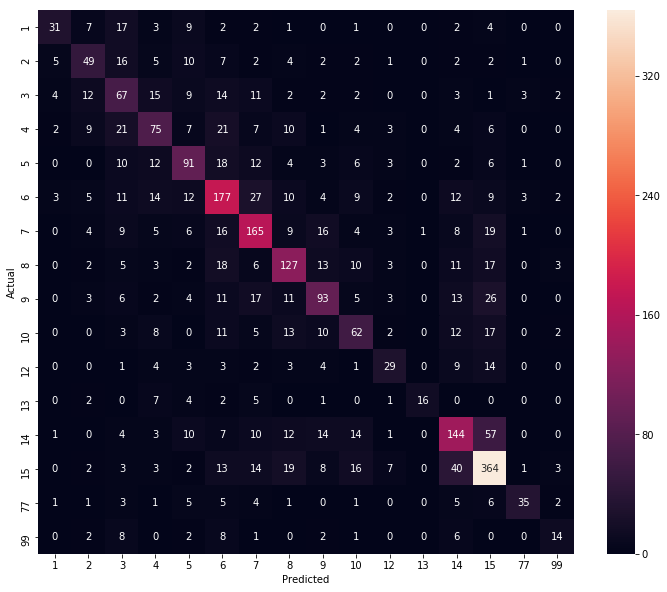

In [71]:
# creating a confusion matrix 
mlp_cm = confusion_matrix(y_test, mlpclf.predict(X_test)) 
class_names = [1,2,3,4,5,6,7,8,9,10,12,13,14,15,77,99]
fig, ax = plt.subplots(figsize=(12,10))
sns.heatmap(mlp_cm, annot=True, fmt='d', xticklabels=class_names, yticklabels=class_names)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

## Conclusions
____
* Predicted Accuracy for Different Models on Test Set:

| Machine Learning Model 	| Accuracy 	| Computational Cost |
|------------------------	|----------	|----------
| Random Forest          	| 0.71    	| 4.9 s
| Gradient Boosting                  	| 0.70     	| 162 s |
| SVM     	| 0.64    	| 17 s |
| Logistic Regression 	| 0.23    	| 1.01 s |
| k-Nearest Neighbor 	| 0.70     	|284 ms  |
| Naive-Bayes 	| 0.19    	|46.9 ms  |
| Multi-Layer Perceptron 	| 0.55     	| 231 s  |

* From the table it can be observed that the **Random-Forest model** has the highest accuracy in comparison to the other models <br>

* The nearest neighbor classifier also performs very well in comparison to the other models is computationally cheaper in comparison to the random-forest model. The lower cost is because the size of the test set is not very big.

* From the feature importance values obtained from the random forest and gradient boosting models it is observed that some of the features which signficantly affect the prediction of the class of the household income are **household reference person age,  ethnicity of participant, education level of household reference person**

* The performance of all the models is significantly improved by excluding the features with the lowest feature importance obtained from the random forest and gradient boosting models



## Recommendations
____
* Since the distribution of the number of samples for each class of the household income is not equal, it is expected that the performance of the models can be improved by gathering more data so that we have a more balanced distribution of the number of samples for each class.